In [1]:
df_pitcher_perf = pd.read_csv('pitcher_perf.csv', index_col=0)
df_pitcher_etc = pd.read_csv('pitcher_etc.csv', index_col=0)

In [2]:
df_pitcher_perf.columns,df_pitcher_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'연도.1', u'ERA_A',
        u'FIP_A', u'ERA+_A', u'FIP+_A', u'WAR_A', u'K/9_A', u'BB/9_A',
        u'HR/9_A', u'K/BB_A', u'PFR_A', u'BIPA_A', u'LOB_A', u'AVG_A', u'OBP_A',
        u'WHIP_A', u'WHIP+_A', u'IP/G_A', u'ERA_B', u'FIP_B', u'ERA+_B',
        u'FIP+_B', u'WAR_B', u'K/9_B', u'BB/9_B', u'HR/9_B', u'K/BB_B',
        u'PFR_B', u'BIPA_B', u'LOB_B', u'AVG_B', u'OBP_B', u'WHIP_B',
        u'WHIP+_B', u'IP/G_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'BirthYear', u'Age', u'Hometown', u'Captain',
        u'NationalMember', u'Marriage', u'Surgery', u'PreviousTeam', u'NewTeam',
        u'Salary', u'Total', u'Period', u'Transfer', u'RewardPlayer',
        u'GoldenGlove', u'Rookie', u'AllStar'],
       dtype='object'))

In [3]:
dfX_pitcher_perf = df_pitcher_perf[['ERA_A', 'FIP_A', 'WAR_A', 'K/9_A', 'BB/9_A', 'HR/9_A', 'BIPA_A', 'LOB_A', 'AVG_A', 'OBP_A', 'WHIP_A', 'IP/G_A', 'ERA_B', 'FIP_B', 'WAR_B', 'K/9_B', 'BB/9_B', 'HR/9_B', 'BIPA_B', 'LOB_B', 'AVG_B', 'OBP_B', 'WHIP_B', 'IP/G_B']]
dfX_pitcher_etc = df_pitcher_etc[['Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_pitcher = df_pitcher_etc['Salary']

In [4]:
idx = dfy_pitcher == '-'
df_pitcher = pd.concat([dfX_pitcher_perf, dfX_pitcher_etc, dfy_pitcher], axis=1)
df_pitcher = sm.add_constant(df_pitcher)
df_pitcher = df_pitcher.drop(df_pitcher.index[idx]).astype(float)

In [5]:
df_pitcher.tail()

,const,ERA_A,FIP_A,WAR_A,K/9_A,BB/9_A,HR/9_A,BIPA_A,LOB_A,AVG_A,...,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
64,1.0,2.84,3.38,3.93,5.18,2.90,0.49,0.285,77.6,0.255,...,35.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,3.50
65,1.0,2.37,3.63,7.12,8.50,3.90,0.60,0.281,83.1,0.221,...,30.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,21.25
66,1.0,4.18,4.92,3.58,6.35,3.49,1.32,0.276,75.1,0.253,...,35.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.00
67,1.0,2.44,4.57,8.14,7.67,3.81,0.88,0.277,87.2,0.232,...,30.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,22.50
68,1.0,3.29,3.93,5.32,6.63,2.98,0.68,0.298,75.7,0.254,...,38.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,3.75


KeyError: 0

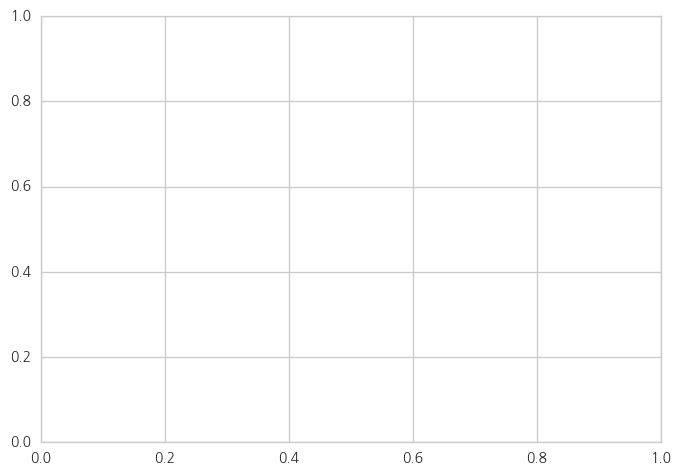

In [24]:
plt.boxplot(df_pitcher.const)

In [7]:
model_sm = sm.OLS(df_pitcher.ix[:,-1], df_pitcher.ix[:,:-1])
result_sm = model_sm.fit()

In [8]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     5.371
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           4.51e-06
Time:                        07:58:02   Log-Likelihood:                -149.87
No. Observations:                  65   AIC:                             367.7
Df Residuals:                      31   BIC:                             441.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8496     42.773     -0.

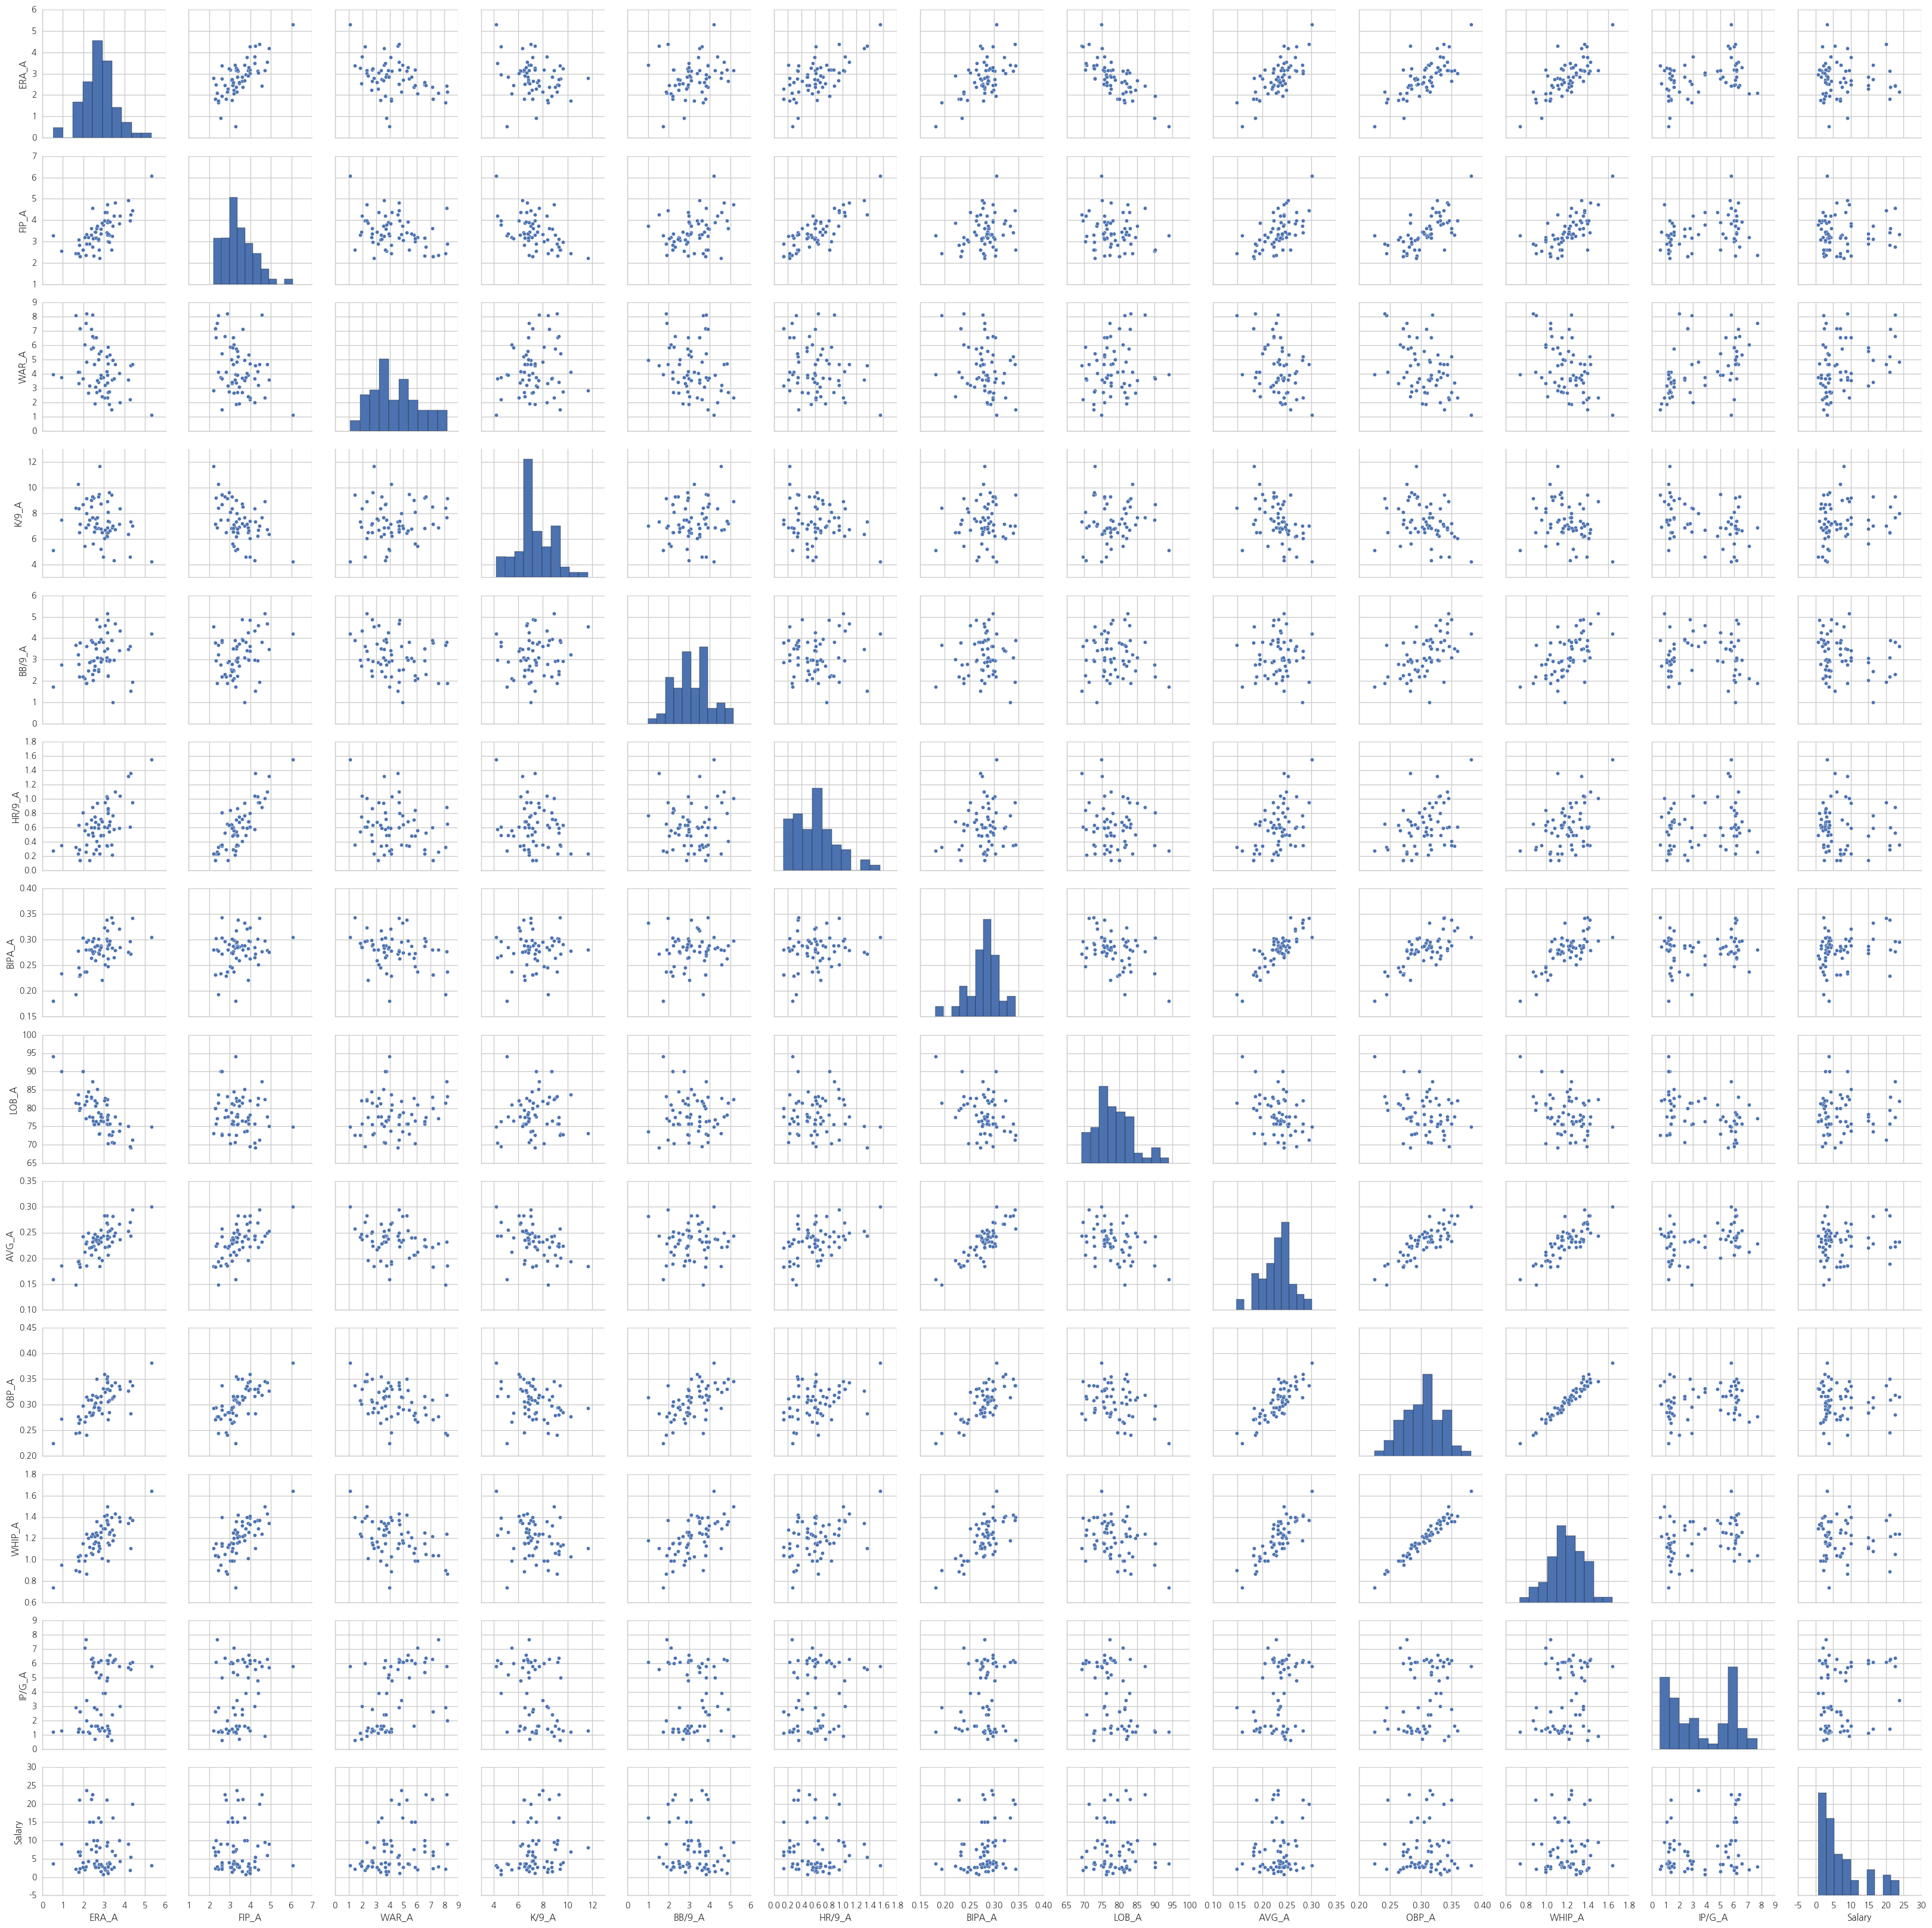

In [9]:
dff = pd.concat([df_pitcher.ix[:,1:13], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

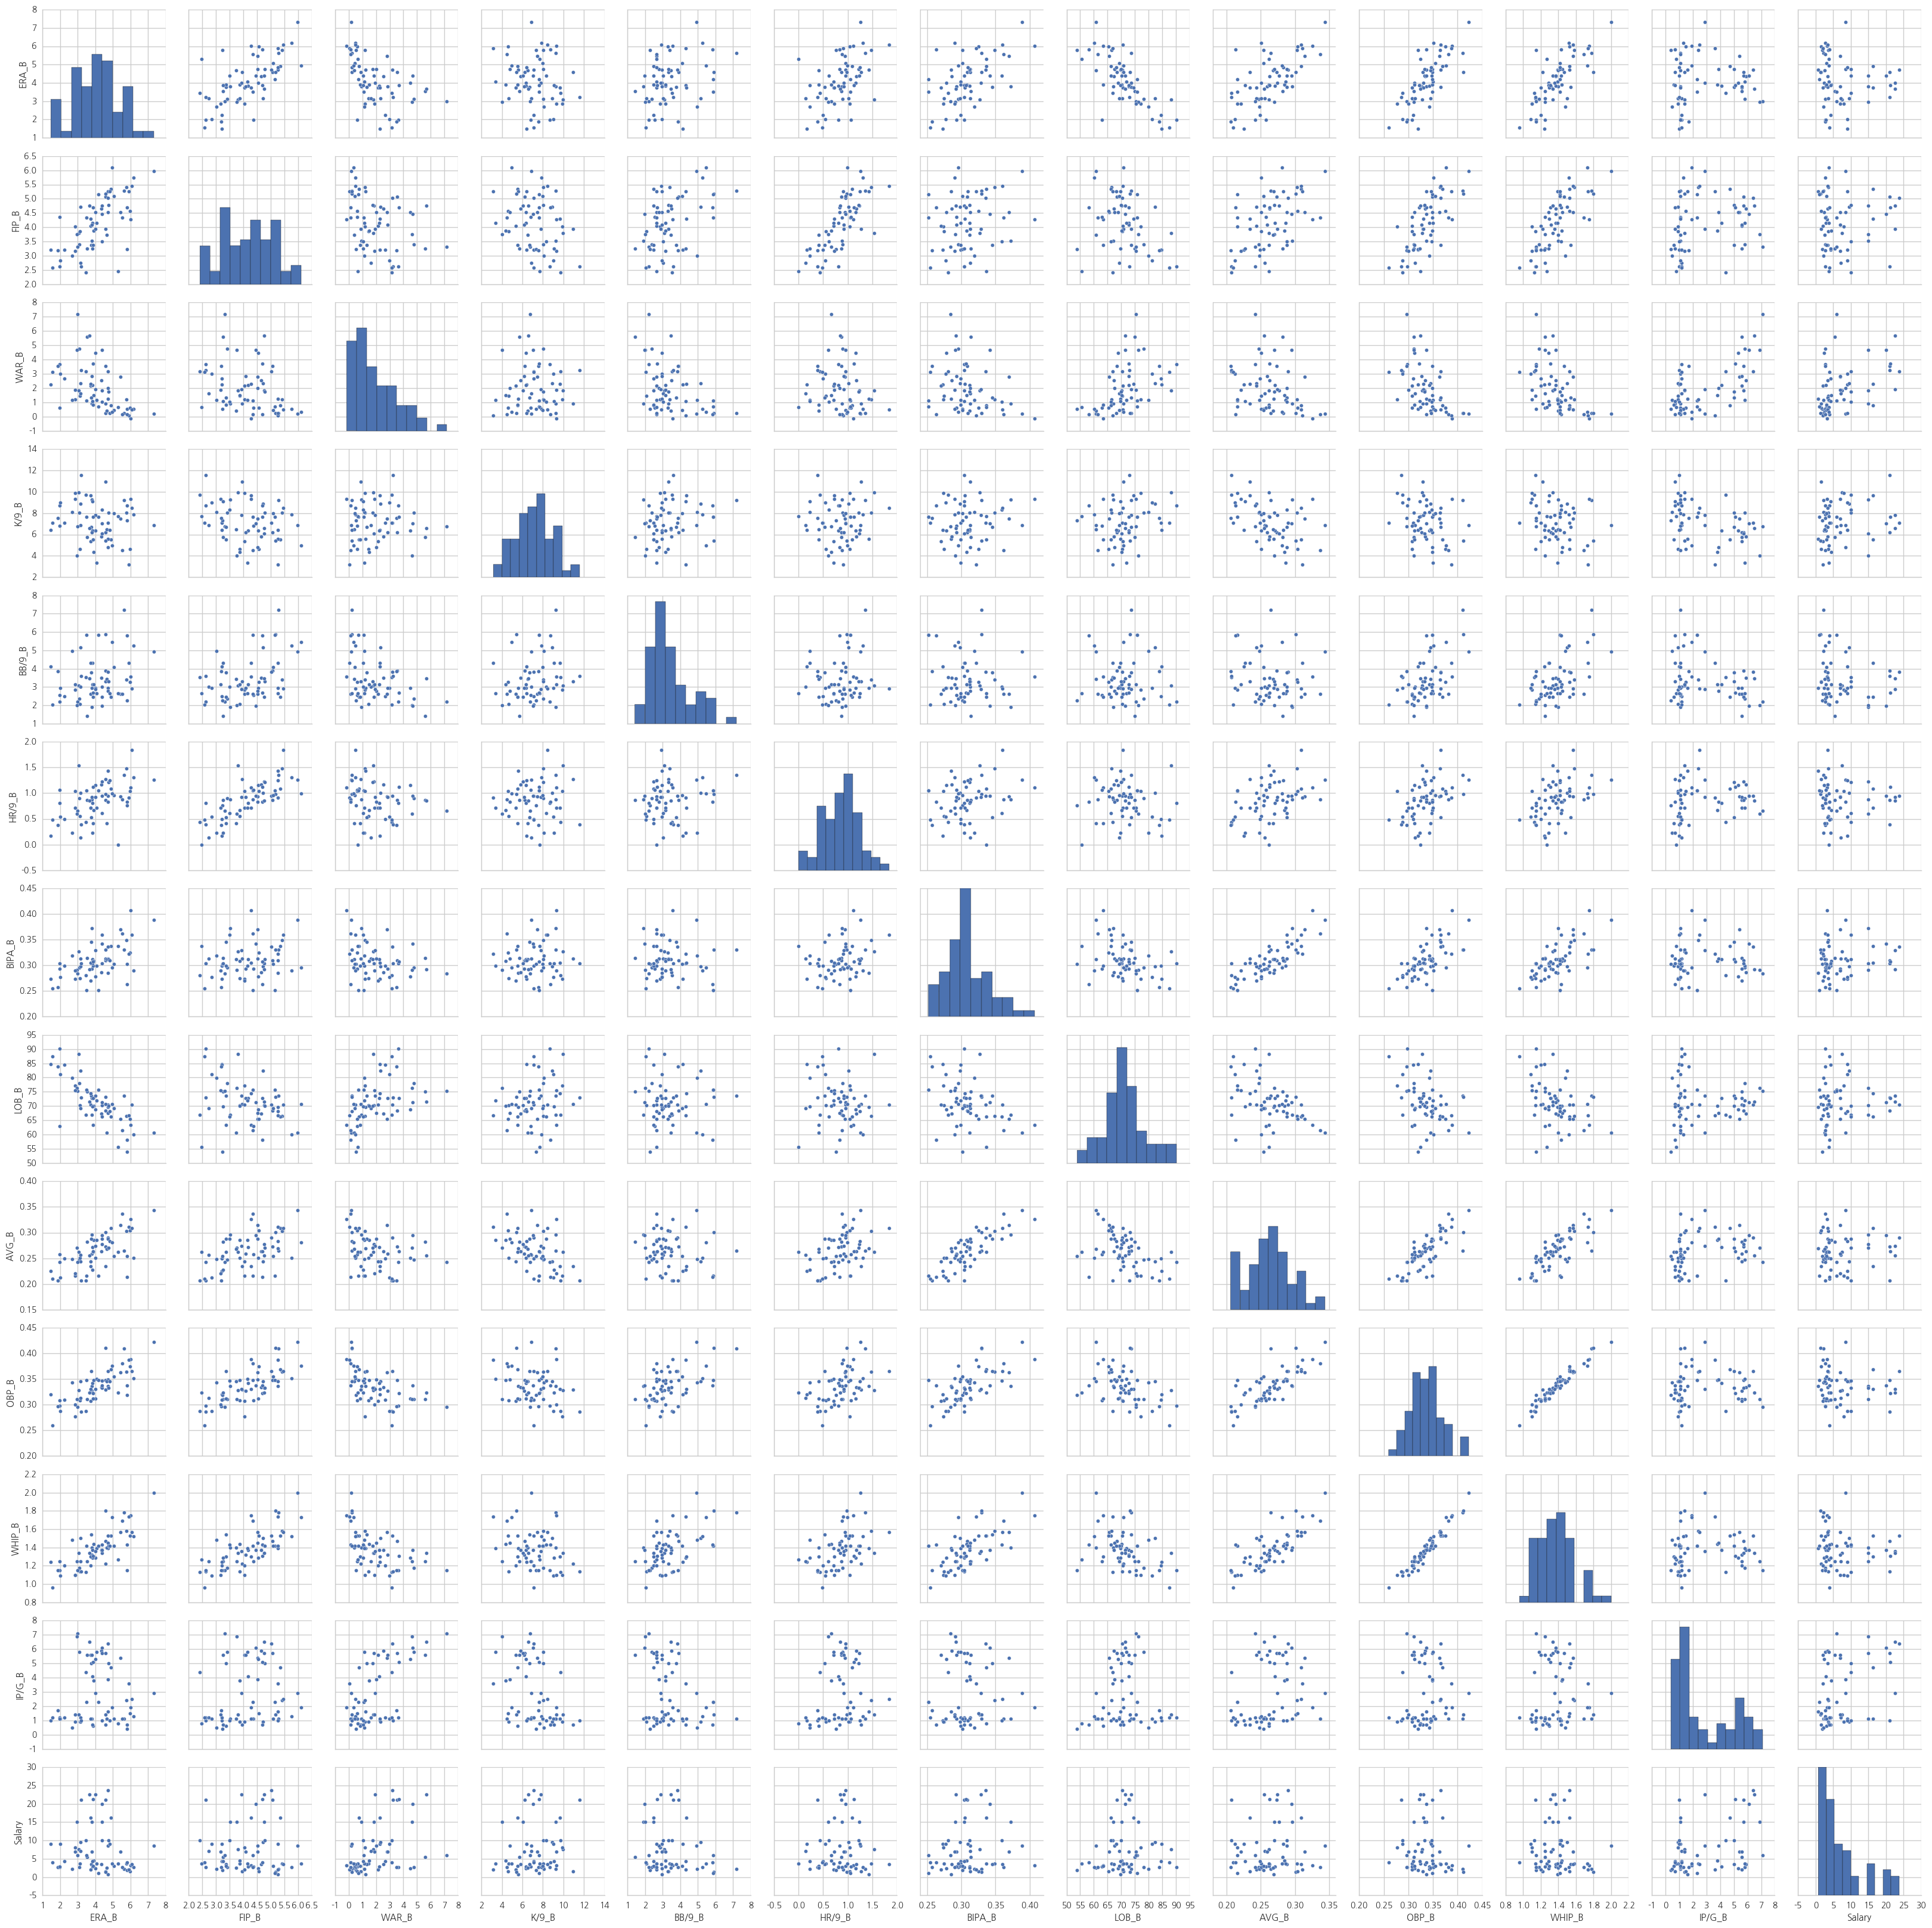

In [10]:
dff = pd.concat([df_pitcher.ix[:,13:25], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

In [12]:
dff = pd.concat([df_pitcher.ix[:25,:-1], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

MemoryError: 

MemoryError: In RendererAgg: Out of memory

1     1.00001
2     1.00001
3     1.00001
4     1.00001
5     1.00001
6     1.00001
7     1.00001
8     1.00001
9     1.00001
10    1.00001
11    1.00001
12    1.00001
13    1.00001
14    1.00001
15    1.00001
16    1.00001
17    1.00001
18    1.00001
19    1.00001
20    1.00001
21    1.00001
22    1.00001
23    1.00001
24    1.00001
25    1.00001
26    1.00001
27    1.00001
28    1.00001
29    1.00001
30    1.00001
       ...   
36    1.00001
37    1.00001
38    1.00001
39    1.00001
42    1.00001
43    1.00001
44    1.00001
45    1.00001
46    1.00001
48    1.00001
49    1.00001
50    1.00001
51    1.00001
52    1.00001
53    1.00001
54    1.00001
55    1.00001
56    1.00001
57    1.00001
58    1.00001
59    1.00001
60    1.00001
61    1.00001
62    1.00001
63    1.00001
64    1.00001
65    1.00001
66    1.00001
67    1.00001
68    1.00001
Name: const, dtype: float64